# Image Processing Techniques for Effective Barcode Scanning


This notebook demonstrates a variety of image processing techniques using **OpenCV** and visualizes the results inline using **Matplotlib**. Each section covers a different image processing technique such as smoothing, sharpening, edge detection, histogram equalization, and transformations like translation and rotation. This provides a comprehensive approach to manipulating and enhancing images.

---



## Importing Libraries
The following libraries are required for this notebook:
1. **OpenCV**: For image processing and transformations.
2. **NumPy**: To handle numerical operations and coordinate systems.
3. **Matplotlib**: To display images.
4. **Pyzbar**: To detect and decode barcodes.

Make sure the libraries are installed. You can install them using:

```bash
pip install opencv-python-headless numpy matplotlib pyzba

**1. Importing Libraries** <br>

We use **OpenCV** for image processing tasks and **Matplotlib** for displaying the images inline in this notebook environment.


In [11]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

**2. Stack Images Utility** <br>

A custom utility function stackImages is used to arrange images in grids with optional labels, helping us compare original and processed images side by side. <br>

**Stacking Images**: This function resizes and arranges multiple images into a single grid, allowing us to visually compare different operations at once.
<br>**Labeling**: Each image in the grid can be labeled to indicate the type of transformation applied.

In [12]:
# Function to stack images and add labels
def stackImages(imgArray, scale, labels=[]):
    # Ensure all rows have the same number of columns
    if not all(len(row) == len(imgArray[0]) for row in imgArray):
        print("Error: Inconsistent number of columns in imgArray rows.")
        return None

    sizeW = imgArray[0][0].shape[1]  # Width of the first image
    sizeH = imgArray[0][0].shape[0]  # Height of the first image
    rows = len(imgArray)
    cols = len(imgArray[0])

    # Create a blank image for padding
    imageBlank = np.zeros((sizeH, sizeW, 3), np.uint8)

    # Resize and prepare images
    for x in range(rows):
        for y in range(cols):
            if imgArray[x][y] is None:
                print(f"Warning: Image at position ({x}, {y}) is None.")
                imgArray[x][y] = np.zeros((sizeH, sizeW, 3), dtype=np.uint8)  # Placeholder
            imgArray[x][y] = cv2.resize(imgArray[x][y], (sizeW, sizeH), None, scale, scale)

            # Convert grayscale images to BGR
            if len(imgArray[x][y].shape) == 2:
                imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)

    # Stack images horizontally
    hor = [np.hstack(imgArray[x]) for x in range(rows)]
    # Stack vertically
    ver = np.vstack(hor)

    # Add labels if provided
    if len(labels) != 0:
        eachImgWidth = int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)

        for d in range(rows):
            for c in range(cols):
                # Draw the rectangle for the label background at the top
                cv2.rectangle(ver, (c * eachImgWidth, eachImgHeight * d),
                              (c * eachImgWidth + len(labels[d][c]) * 10 + 9, 12 + eachImgHeight * d),
                              (255, 255, 255), cv2.FILLED)

                # Put the label text at the top
                cv2.putText(ver, labels[d][c], (eachImgWidth * c + 10, eachImgHeight * d + 12),
                            cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 0), 1)  # Black color

    return ver


**3. Image Loading** <br>

We load the image using **cv2.imread()** to begin the processing pipeline. If the image is not found, an error message is displayed.

In [13]:
# Load the image
path = "./Resources/One-DimensionalBarCodes.jpg"
img = cv2.imread(path)

if img is None:
    print("Image not found at the specified path.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


**4. Smoothing Filters** <br>

Smoothing reduces image noise and detail. We apply two common smoothing techniques: <br>

- **Averaging Blur**: Blurs the image by averaging pixel values in a neighborhood.<br>
- **Gaussian Blur**: Uses a Gaussian function for weighting pixel values, resulting in a more natural-looking blur.

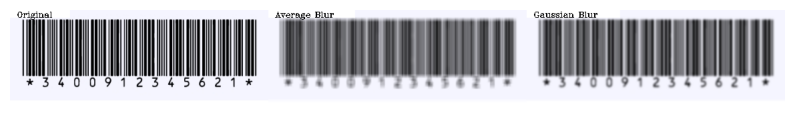

In [14]:
if img is not None:
    kernel = np.ones((5, 5), np.uint8)

    # Step 1: Smoothing Filters
    imgBlur = cv2.blur(img, (7, 7))  # Averaging Blur
    imgGaussianBlur = cv2.GaussianBlur(img, (7, 7), 0)  # Gaussian Blur

    # Stack images for Smoothing Filters
    smoothingImages = stackImages(
        [[img, imgBlur, imgGaussianBlur]],
        0.6,
        labels=[["Original", "Average Blur", "Gaussian Blur"]]
    )

    # Display the images for smoothing inline
    if smoothingImages is not None:
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(smoothingImages, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axes
        plt.show()


**5. Sharpening** enhances the edges in an image, making details stand out. A convolution kernel is applied to sharpen the image.

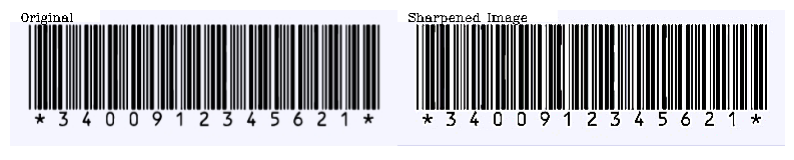

In [15]:
if img is not None:
    # Step 2: Sharpening
    kernel_sharpening = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    imgSharpen = cv2.filter2D(img, -1, kernel_sharpening)

    # Stack images for Sharpening
    sharpeningImages = stackImages(
        [[img, imgSharpen]],
        0.6,
        labels=[["Original", "Sharpened Image"]]
    )

    # Display the images for sharpening inline
    if sharpeningImages is not None:
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(sharpeningImages, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axes
        plt.show()

**6. Edge detection highlights the boundaries within images:** <br>

- **Sobel X and Y**: Detects edges in horizontal and vertical directions. <br>
- **Canny Edge Detection**: Detects edges by calculating gradients and tracing along strong edges.

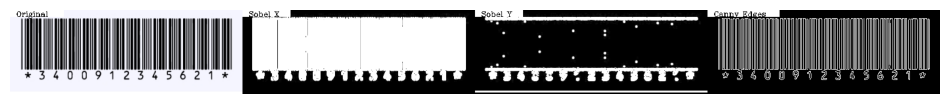

In [16]:
if img is not None:
    # Step 3: Edge Detection
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgSobelX = cv2.Sobel(imgGray, cv2.CV_64F, 1, 0, ksize=5)
    imgSobelX = cv2.convertScaleAbs(imgSobelX)
    imgSobelY = cv2.Sobel(imgGray, cv2.CV_64F, 0, 1, ksize=5)
    imgSobelY = cv2.convertScaleAbs(imgSobelY)
    imgCanny = cv2.Canny(img, 100, 200)

    # Stack images for Edge Detection
    edgeDetectionImages = stackImages(
        [[img, imgSobelX, imgSobelY, imgCanny]],
        0.6,
        labels=[["Original", "Sobel X", "Sobel Y", "Canny Edges"]]
    )

    # Display the images for edge detection inline
    if edgeDetectionImages is not None:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(edgeDetectionImages, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axes
        plt.show()


**7. Histogram Equalization** <br>

Histogram Equalization improves contrast in images by redistributing the pixel intensity values. It is particularly useful for enhancing grayscale images.

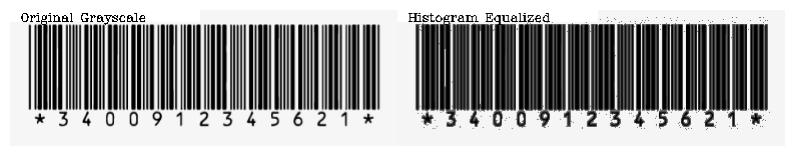

In [17]:
if img is not None:
    # Step 4: Histogram Equalization
    imgGrayEqualized = cv2.equalizeHist(imgGray)

    # Stack images for Histogram Equalization
    histEqualizationImages = stackImages(
        [[imgGray, imgGrayEqualized]],
        0.6,
        labels=[["Original Grayscale", "Histogram Equalized"]]
    )

    # Display the images for histogram equalization inline
    if histEqualizationImages is not None:
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(histEqualizationImages, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axes
        plt.show()

In [18]:
# Final message indicating that all operations are done
print("All image processing operations completed.")

All image processing operations completed.


This section provides an in-depth analysis of how each image processing technique affects barcode readability and detection accuracy

Image loaded successfully.
Step 1: Original Image
Detected Barcode: CODE39: 3400912345621 (Box: 19,15,0,84) | Confidence: High | Bounding Box: 19,15,0,84


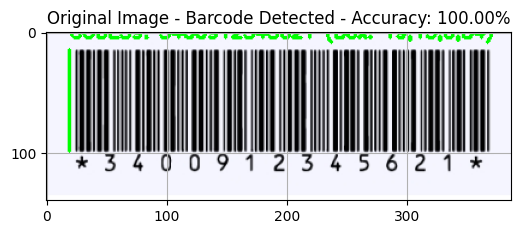

Step 2: Sharpened Image
Detected Barcode: CODE39: 3400912345621 (Box: 19,16,350,83) | Confidence: High | Bounding Box: 19,16,350,83


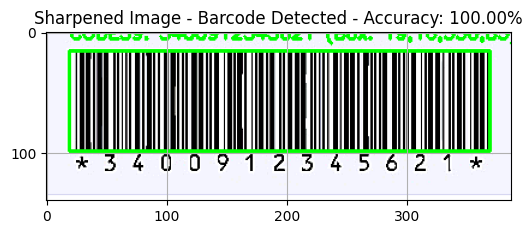

Step 3: Edge Detection


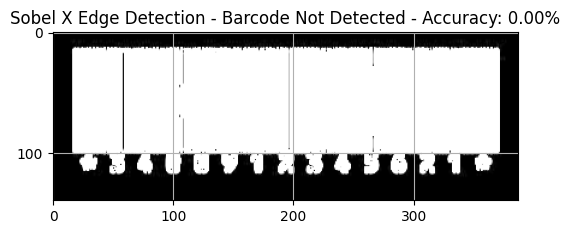

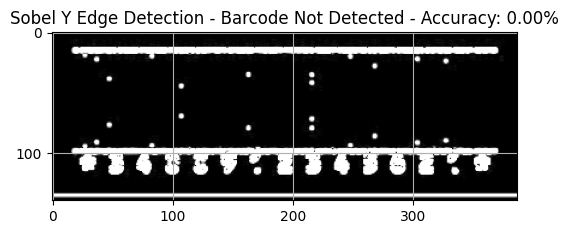

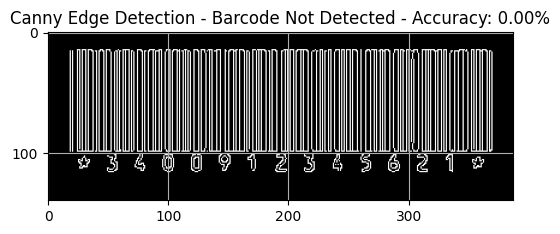

Step 4: Grayscale Image
Detected Barcode: CODE39: 3400912345621 (Box: 19,15,0,84) | Confidence: High | Bounding Box: 19,15,0,84


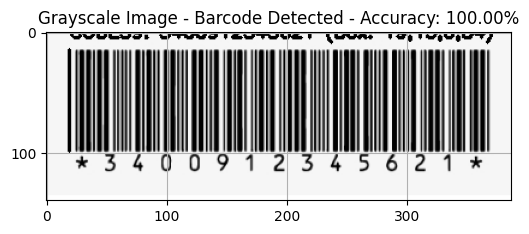

Step 5: Histogram Equalization


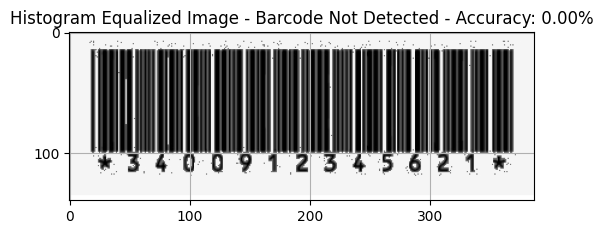

In [19]:
# Import necessary libraries
from pyzbar import pyzbar

# Function to detect and recognize barcodes, and draw rectangles with text
def detectAndRecognizeBarcodes(image, expected_barcodes=1):
    barcodes = pyzbar.decode(image)
    num_detected = len(barcodes)
    
    for barcode in barcodes:
        x, y, w, h = barcode.rect
        barcodeData = barcode.data.decode("utf-8")
        barcodeType = barcode.type

        # Draw rectangle around the barcode
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the barcode type and data on the image
        text = f"{barcodeType}: {barcodeData} (Box: {x},{y},{w},{h})"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Assuming a confidence level, print the detected barcode information
        print(f"Detected Barcode: {text} | Confidence: High | Bounding Box: {x},{y},{w},{h}")

    # Calculate the detection accuracy percentage
    accuracy = (num_detected / expected_barcodes) * 100 if expected_barcodes > 0 else 0

    detection_status = "Detected" if num_detected > 0 else "Not Detected"
    return image, detection_status, accuracy

# Function to display the image with barcodes and show X, Y rulers
def showImageWithBarcode(img, title, expected_barcodes=1):
    imgWithBarcodes, detection_status, accuracy = detectAndRecognizeBarcodes(img.copy(), expected_barcodes)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(imgWithBarcodes, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} - Barcode {detection_status} - Accuracy: {accuracy:.2f}%")
    plt.grid(True)  # Display X, Y rulers
    plt.xticks(np.arange(0, imgWithBarcodes.shape[1], step=100))  # Custom X ticks for ruler
    plt.yticks(np.arange(0, imgWithBarcodes.shape[0], step=100))  # Custom Y ticks for ruler
    plt.show()

# Load the image
path = "./Resources/One-DimensionalBarCodes.jpg"
img = cv2.imread(path)

if img is None:
    print("Image not found at the specified path.")
else:
    print("Image loaded successfully.")

# Assume we expect 1 barcode in the image (you can change this based on actual barcode count)
expected_barcodes = 1

# Step-by-Step Processing and Barcode Detection with Rulers and Accuracy
# Step 1: Original Image
print("Step 1: Original Image")
showImageWithBarcode(img, "Original Image", expected_barcodes)

# Step 2: Sharpened Image
print("Step 2: Sharpened Image")
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
imgSharpen = cv2.filter2D(img, -1, kernel_sharpening)
showImageWithBarcode(imgSharpen, "Sharpened Image", expected_barcodes)

# Step 3: Edge Detection
print("Step 3: Edge Detection")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgSobelX = cv2.Sobel(imgGray, cv2.CV_64F, 1, 0, ksize=5)
imgSobelX = cv2.convertScaleAbs(imgSobelX)
showImageWithBarcode(imgSobelX, "Sobel X Edge Detection", expected_barcodes)

imgSobelY = cv2.Sobel(imgGray, cv2.CV_64F, 0, 1, ksize=5)
imgSobelY = cv2.convertScaleAbs(imgSobelY)
showImageWithBarcode(imgSobelY, "Sobel Y Edge Detection", expected_barcodes)

imgCanny = cv2.Canny(img, 100, 200)
showImageWithBarcode(imgCanny, "Canny Edge Detection", expected_barcodes)

# Step 4: Grayscale Image
print("Step 4: Grayscale Image")
showImageWithBarcode(imgGray, "Grayscale Image", expected_barcodes)

# Step 5: Histogram Equalization
print("Step 5: Histogram Equalization")
imgGrayEqualized = cv2.equalizeHist(imgGray)
showImageWithBarcode(imgGrayEqualized, "Histogram Equalized Image", expected_barcodes)


In [20]:
# Final message indicating that all operations are done
print("All image processing operations, including barcode detection, ruler display, and accuracy calculation, are completed.")

All image processing operations, including barcode detection, ruler display, and accuracy calculation, are completed.


**Conclusion** <br>

This notebook demonstrates how various image processing techniques can be applied using OpenCV, and the results are visualized inline for easy comparison. These techniques are essential for tasks like image enhancement, feature extraction, and preparing images for further analysis or machine learning models.